In [99]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

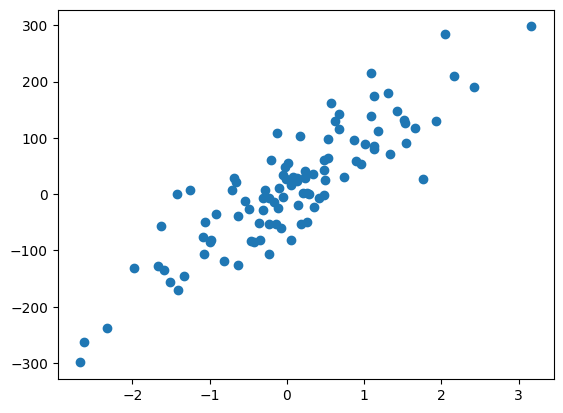

In [117]:
x, y = make_regression(n_samples=100, n_features=2, noise=10)
plt.scatter(x[:, 0], y)

In [118]:
print(x.shape)
y=y.reshape(x.shape[0], 1)
print(y.shape)

(100, 2)
(100, 1)


In [119]:
X = np.hstack((x, np.ones(x.shape)))
print(X)

[[ 0.22801327  0.37182806  1.          1.        ]
 [ 0.49487236 -0.22841553  1.          1.        ]
 [ 0.66890349  0.93965272  1.          1.        ]
 [-1.08719715  0.29048114  1.          1.        ]
 [ 1.53313107 -0.54940746  1.          1.        ]
 [-0.63341492  0.62308091  1.          1.        ]
 [ 0.56855773  2.25366362  1.          1.        ]
 [-0.49599461  0.46301973  1.          1.        ]
 [ 0.74153387 -0.27913842  1.          1.        ]
 [-1.51819736 -0.4159666   1.          1.        ]
 [ 0.52826139  0.51884906  1.          1.        ]
 [ 0.34291326  0.08051761  1.          1.        ]
 [-1.58778611  0.0577236   1.          1.        ]
 [-0.80760775 -0.82787857  1.          1.        ]
 [ 0.95554722 -0.72230656  1.          1.        ]
 [ 0.53679925  1.3887369   1.          1.        ]
 [-1.41216907 -0.80619493  1.          1.        ]
 [ 0.23053708  0.59329925  1.          1.        ]
 [ 0.14204279 -0.77565197  1.          1.        ]
 [-0.99867013 -0.18199593  1.  

In [103]:
theta = np.random.randn(3, 1)
theta.shape

(3, 1)

Modele

In [104]:
def model(X, theta):
    return X.dot(theta)

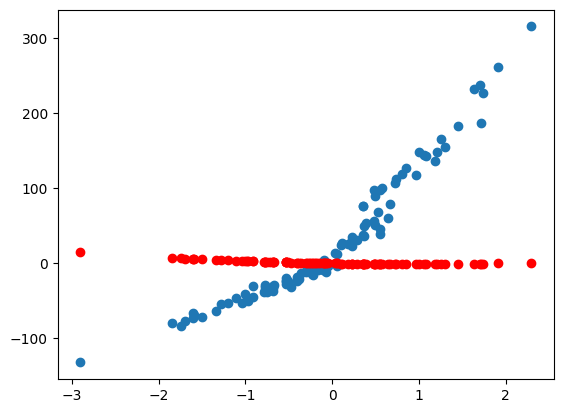

In [105]:
plt.scatter(x, y)
plt.scatter(x, model(X, theta), c='r')

Fonction coût

In [106]:
def function_cost(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [107]:
function_cost(X, y, theta)

4142.722582555869

Gradient et Descente de Gradient

In [108]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [109]:
def gradient_descent(X, y, theta, learning_rate, n_iteration):
    cost_history = np.zeros(n_iteration)

    for i in range(0, n_iteration):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = function_cost(X, y, theta)
    return theta, cost_history

In [110]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iteration=1000)

In [111]:
theta_final

array([[18.02411711],
       [89.52283728],
       [17.20085237]])

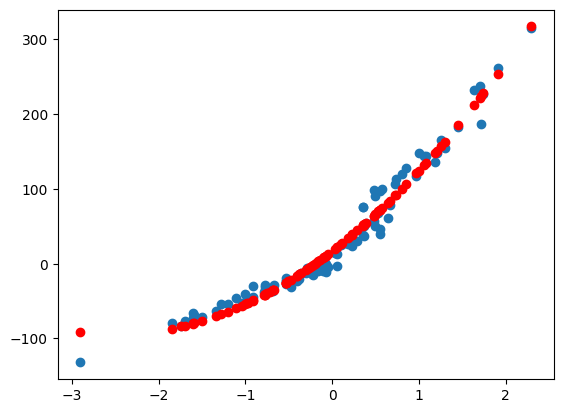

In [112]:
prediction = model(X, theta_final)
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], prediction, c='r')

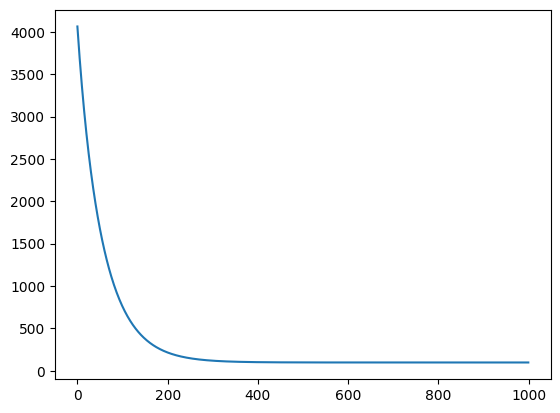

In [113]:
plt.plot(range(1000), cost_history)

In [114]:
def coef_relation(y, pred):
    u = ((y - pred) ** 2).sum()
    v = ((y - y.mean()) ** 2).sum()
    return 1 - u / v

In [115]:
coef_relation(y, prediction)

0.9731887366358185